# Explore AI Academy: Regression Project

Brandon Marlon Jacobs

bjacobs8@oldmutual.com

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
    * [1.2 Objectives](#section_1_2)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Data Processing](#chapter6)
* <b>[7. Model training and Evaluation](#chapter7)
* <b>[8. Conclusion](#chapter6)

## 1. Project Overview 
### 1.1 Introduction

The aim is to analyse and predict average temperature from the agri-food sector, using data from the FAO and IPCC, to understand climate impacts and develop sustainable strategies for stakeholders including policymakers and agricultural businesses.



Importance of the Study:
This dataset provides a detailed examination of CO₂ emissions in the agricultural sector across various countries and years. The emissions are broken down by activities within the agriculture sector, including crop residue burning, rice cultivation, pesticide manufacturing, energy use, and forest fires, among others. Given the pressing global issue of climate change, understanding the sources and trends of greenhouse gas emissions, especially from agriculture (a significant contributor), is vital for policymakers, researchers, and environmental advocates. The dataset also includes population data and average temperature, offering a unique opportunity to analyze correlations between human demographics, agricultural activities, and environmental impacts..

Methodology Overview:

To address these questions, the analysis will involve various statistical techniques, including:

Univariate and multivariate analysis to understand individual and collective trends in vegetable prices.
Correlation analysis to detect relationships between different vegetable prices.
Outlier detection to identify significant price spikes and analyze their causes.

Structure of the Notebook:
The notebook is structured into several key sections:

Introduction: Outlines the objectives and scope of the project.

Data Exploration: A deep dive into understanding the dataset, identifying key variables, and checking data quality.
This involves the following: Importing Packages , Loading Data and Data Cleaning.

Univariate Analysis: A look at individual vegetable prices to understand distribution and central tendencies.

Multivariate Analysis: Explores the relationships between multiple variables and detects patterns across the dataset

Model Building : Create and test regression models..

Conclusion and Insights: Summarizes the key findings, including potential business and policy implication.s


### 1.1.1 Problem Statement 

Agriculture is a substantial source of CO₂ emissions, impacting climate change and environmental sustainability. The growing demand for food, coupled with practices that emit significant amounts of greenhouse gases, presents a challenge for reducing emissions in a sector essential for human sustenance. However, a granular understanding of which agricultural activities contribute the most and how these emissions vary across regions and over time is often lacking. Without this understanding, targeted policies to mitigate emissions in agriculture risk being ineffective.

### 1.2 Objectives

Impact of Population and Temperature: Investigate correlations between agricultural emissions, population demographics, and average temperature to assess how human and environmental factors influence emissions.

Model Prediction of Average Temperature: Explore predictive modeling to assess how agricultural activities, population, and other factors might influence local temperatures, utilizing regression models for temperature predictions based on the dataset’s variables.

## 2. Importing Packages

This data set was created to veggie prices for 10 types over a year across different regions, and analyze the data to find interesting facts.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.

In [509]:
# Libraries for data loading, manipulation and analysis
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import datetime
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.impute import SimpleImputer


# Displays output inline
%matplotlib inline

## 3.Loading Data

The data used for this project was located in the prices.csv file. To better manipulate and analyse the titles.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv() and referred to as titles_import. For demonstrating the column index in the dataframe , index_col=False was implemented.

In [12]:
# loading dataset
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)
df.head(5) 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


To set the maximum number of columns to be displayed, the pd.set_option() function was put in place.

In [14]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the df.copy() method and referred to as `df_copy`.
</div>

In [16]:
# The copy of the dataframe
df_copy = df.copy()

In [17]:
# Displays the number of rows and columns
df_copy.shape

(6965, 31)

In [18]:
# summary of dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         



<strong><em> The dataset consists of 287 rows (observations) and 11 columns (features).  </em></strong>

In [20]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


### 3.1.Summary

The dataset contains information on CO2 emissions from agricultural sources across different years and countries, with the following key details:

1. Columns: There are 31 columns, including:

    Country and Year: Indicate the location and time for the data points.
    Emission Sources: Multiple columns cover different CO2 emission sources, such as "Savanna fires," "Forest fires," "Crop Residues," "Rice Cultivation," etc.

3. Supporting Variables: Additional data on agricultural practices, population demographics, and average temperatures.
Numeric Ranges: Values vary widely across columns, likely due to differing units and metrics.

4. Missing Data: Some columns, like "On-farm energy use," contain NaN values, suggesting incomplete data for some factors.

## 4. Data Cleaning

The `check_null_values` function iterates over each column in a DataFrame to identify and print the count of null values, providing column-specific null counts.

In [208]:
def check_null_values(df_copy):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df_copy (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    for column in df_copy.columns:
        null_count = df_copy[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')

In [209]:
check_null_values(df_copy)

Savanna fires has 31 null values
Forest fires has 93 null values
Crop Residues has 1389 null values
Forestland has 493 null values
Net Forest conversion has 493 null values
Food Household Consumption has 473 null values
IPPU has 743 null values
Manure applied to Soils has 928 null values
Manure Management has 928 null values
Fires in humid tropical forests has 155 null values
On-farm energy use has 956 null values


Checking Missing Rate %

In [211]:
# Calculate the missing rate for each column in the dataset
missing_rate = df_copy.isnull().mean() * 100  # Convert to percentage

# Display the missing rate for each column
missing_rate.sort_values(ascending=False)

Crop Residues                      19.942570
On-farm energy use                 13.725772
Manure applied to Soils            13.323762
Manure Management                  13.323762
IPPU                               10.667624
Net Forest conversion               7.078248
Forestland                          7.078248
Food Household Consumption          6.791098
Fires in humid tropical forests     2.225413
Forest fires                        1.335248
Savanna fires                       0.445083
Total Population - Male             0.000000
Urban population                    0.000000
Total Population - Female           0.000000
total_emission                      0.000000
Rural population                    0.000000
Fires in organic soils              0.000000
Manure left on Pasture              0.000000
Area                                0.000000
Agrifood Systems Waste Disposal     0.000000
Fertilizers Manufacturing           0.000000
Food Processing                     0.000000
Year      

In [339]:
# Imputing missing values for the dataset
# Numerical columns: filling NaNs with the median as it's less affected by outliers
data_imputed = df_copy.fillna(data_renamed.median(numeric_only=True))

# Display the first few rows of the imputed dataset to verify the changes
data_imputed.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils,Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average_Temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


The count_duplicate_rows function checks a DataFrame for duplicate entries by utilizing the duplicated method, which identifies duplicates, and then summarizes the total number of duplicate rows. This function is useful for data cleaning processes, ensuring uniqueness in datasets by returning the count of duplicate rows.

In [341]:
def count_duplicate_rows(data_imputed):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df_copy (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df_copy.duplicated().sum()
    return duplicate_count

In [343]:
count_duplicate_rows(data_imputed)

0

In [345]:
# Renaming columns in the dataset
data_imputed = data_imputed.rename(columns={
    'Average Temperature °C': 'Average_Temperature',
    'Drained organic soils (CO2)': 'Drained organic soils'
})

# Display the first few rows to confirm the renaming
data_imputed.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils,Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average_Temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


The Area Feature will be removed as the goal is a generalized prediction model, without focusing on regional specifics. In this case, "Area" might add unnecessary complexity.

In [347]:
# Dropping the "Area" feature from the dataset
data_dropped_area = data_imputed.drop(columns=["Area"])

# Display the first few rows of the modified dataset to confirm the removal of the "Area" column
data_dropped_area.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils,Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average_Temperature
0,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


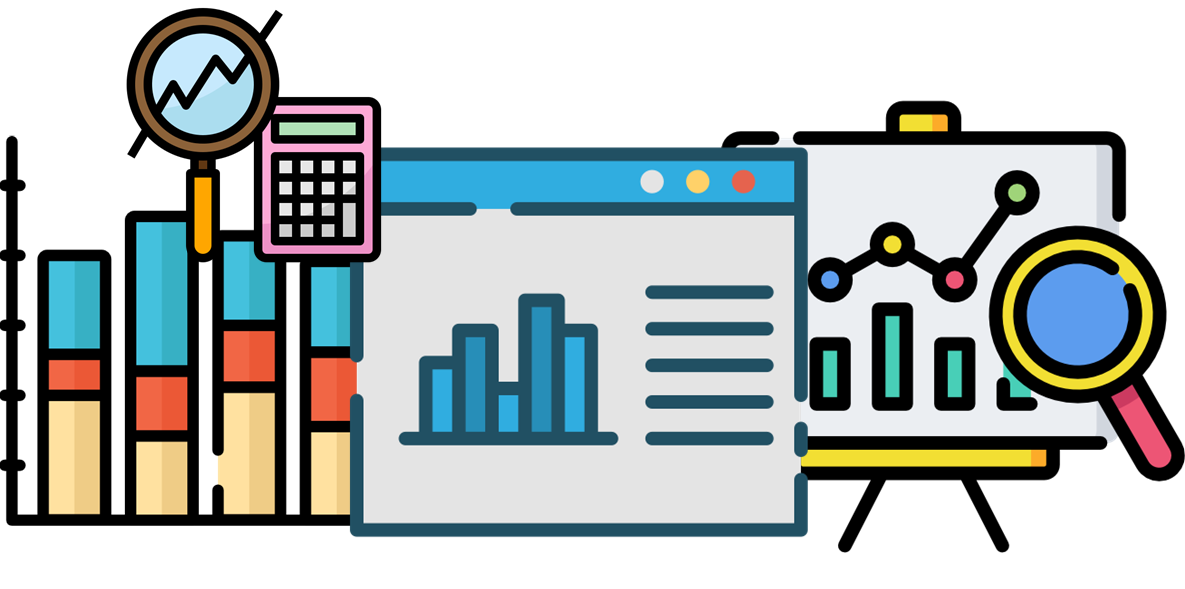

## 5. Exploratory Data Analysis (EDA)

To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

-What is the distribution of the dataset?

-Are there any missing numerical values, outliers or anomalies in the dataset?

-What are the underlying assumptions in the dataset?

-Whether there exists relationships between variables in the dataset?

### 5.1 Univariate analysis

One of the univariate analysis (non-graphical), is the method .info(). This method outputs important details about the dataset which includes the columns: the data types (Dtype) of the columns and the count of non-null values.

In [541]:
df_dummies.describe()

,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,Net_Forest_conversion,Food_Household_Consumption,Food_Retail,On-farm_Electricity_Use,Food_Packaging,Agrifood_Systems_Waste_Disposal,Food_Processing,Fertilizers_Manufacturing,IPPU,Manure_applied_to_Soils,Manure_left_on_Pasture,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average Temperature,Average_Temperature
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.222000e+03,6037.000000,6965.000000,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,0.0,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,4847.580384,2043.210539,1626.681460,1658.629808,6018.444633,3872.724461,3035.723356,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,NaN,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,25789.143619,8494.249260,9343.182193,11481.343725,22156.742542,19838.216846,11693.029064,1.114209e+05,3226.992039,9103.556202,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,NaN,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,NaN,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,11.399950,26.818500,8.037600,67.631366,86.680500,209.587728,360.358799,3.903153e+01,16.303000,139.669900,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,NaN,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,155.471100,172.042600,29.120700,74.018133,901.275700,344.760200,1115.052400,8.037066e+02,120.443900,972.567400,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,NaN,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,1377.151950,1075.999100,499.944700,281.791000,3006.442100,1236.913400,2024.869900,6.155175e+03,460.120200,2430.792600,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,NaN,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,466288.200700,133784.065300,165676.299000,175741.306100,213289.701600,274253.512500,170826.423300,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,NaN,3.558083


The dataset contains prices for various vegetables across different dates. The columns include:

-Year
-Savanna fires:
-Forest fires: 
-Crop Residues: 
-Rice Cultivation: 
-Drained organic soils (CO2): 
-Pesticides Manufacturing: 
-Food Transport: 
-Forestland:
-Net Forest conversion: 
-Food Household Consumption	: 
-Food Retail: 
-On-farm Electricity Use
-Food Packaging
-Agrifood Systems Waste Disposal
-Food Processing
-Fertilizers Manufacturing	
-IPPU
-Manure applied to Soils
-Manure left on Pasture
-Manure Management
-Fires in organic soils
-Fires in humid tropical forests
-On-farm energy use
-Rural population
-Urban population
-Total Population - Male
-Total Population - Female
-total_emission
-Average Temperature °C


Using Histograms to analyse the distribution of data for each  feature

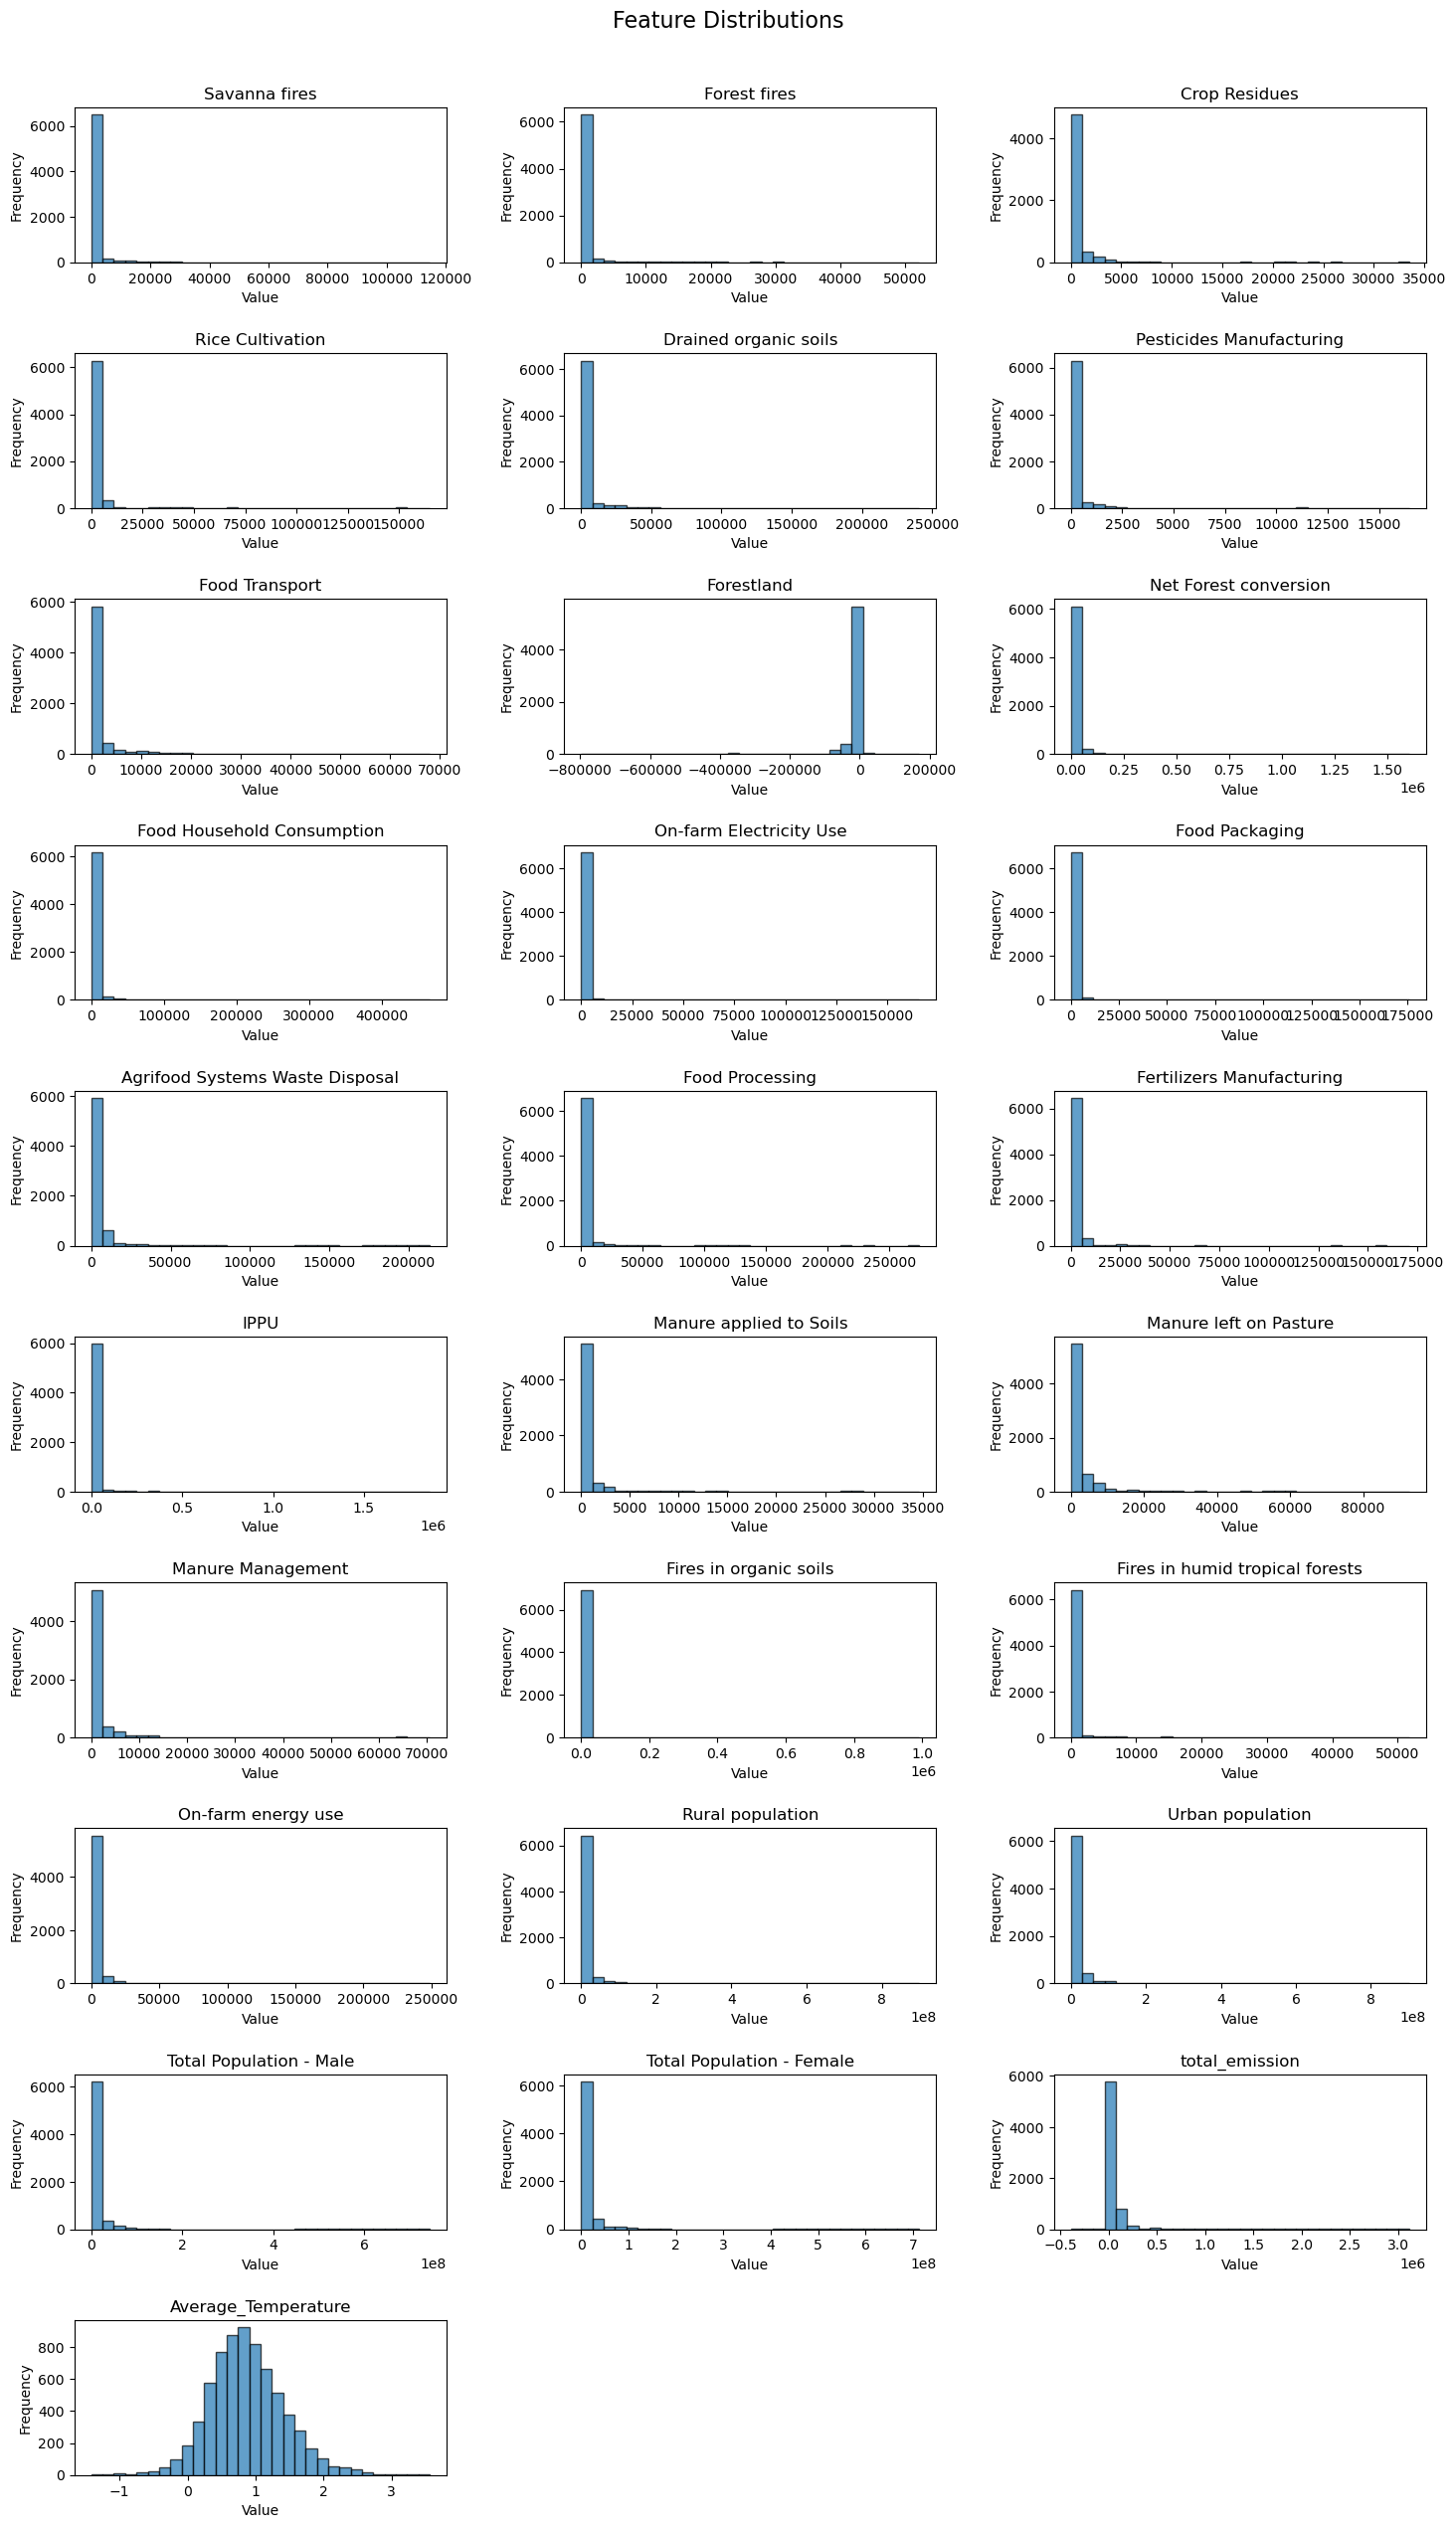

In [490]:
# Define features to plot
features = ["Savanna fires", "Forest fires", "Crop Residues", "Rice Cultivation",
            "Drained organic soils", "Pesticides Manufacturing", "Food Transport",
            "Forestland", "Net Forest conversion", "Food Household Consumption", "On-farm Electricity Use",
            "Food Packaging", "Agrifood Systems Waste Disposal", "Food Processing", "Fertilizers Manufacturing",
            "IPPU", "Manure applied to Soils", "Manure left on Pasture", "Manure Management", 
            "Fires in organic soils", "Fires in humid tropical forests", "On-farm energy use",
            "Rural population", "Urban population", "Total Population - Male", "Total Population - Female",
            "total_emission", "Average_Temperature"]

# Plot histograms for each feature
plt.figure(figsize=(15, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(10, 3, i)
    plt.hist(df_copy[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f"{feature}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout(pad=2)

plt.suptitle("Feature Distributions", y=1.02, fontsize=16)
plt.show()

Using Boxplots to analyse and identify whether our data has any outliers

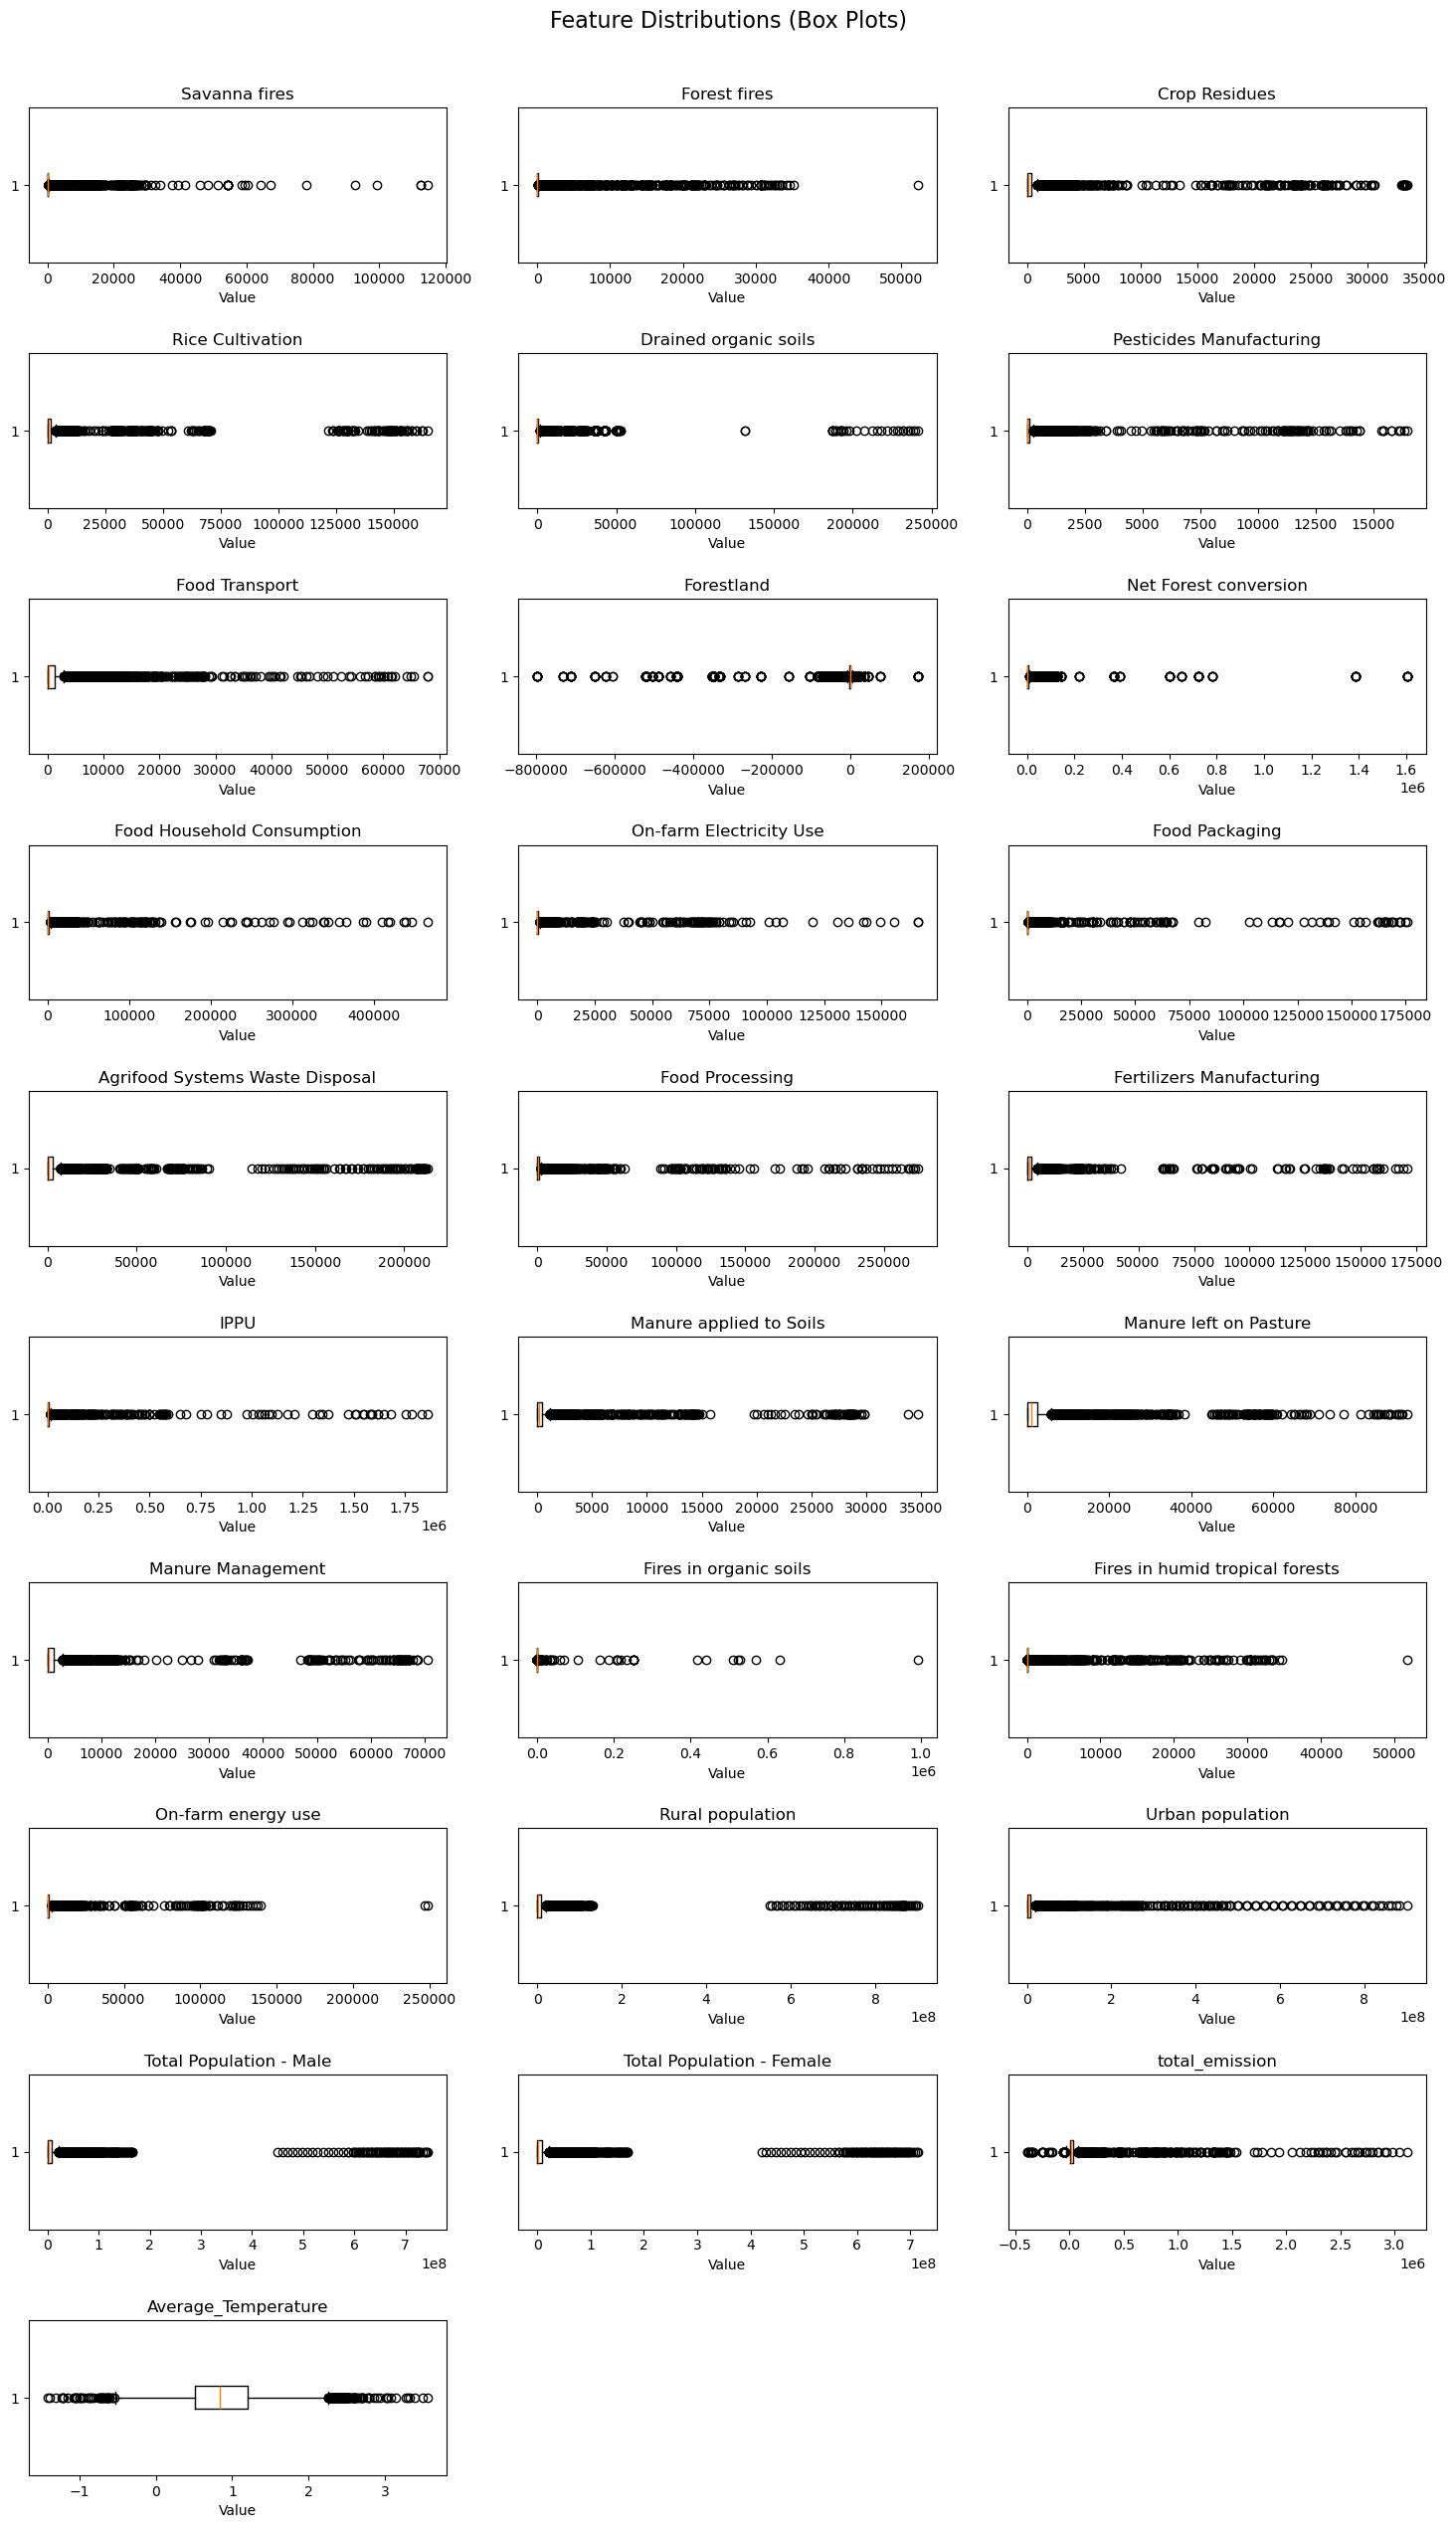

In [492]:
# Plot box plots for each feature to analyze the spread and potential outliers
plt.figure(figsize=(15, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(10, 3, i)
    plt.boxplot(df_copy[feature].dropna(), vert=False)
    plt.title(f"{feature}")
    plt.xlabel("Value")
    plt.tight_layout(pad=2)

plt.suptitle("Feature Distributions (Box Plots)", y=1.02, fontsize=16)
plt.show()

From the consolidated box plot, we can observe several key insights:

1. Wide Range of Values:
    - Certain features, like Forestland and total_emission, exhibit large ranges with significant variability, indicating that countries or regions have very different contributions or emissions from these sources.
    - Features like Pesticides Manufacturing and Food Packaging have comparatively smaller ranges, suggesting more consistent values across regions.
  
2. Presence of Outliers:
    - Many features, such as Savanna fires, Forest fires, Crop Residues, and Rice Cultivation, show considerable outliers, which may be due to unique agricultural practices, climate conditions, or specific high-emission events in certain regions.
    - Outliers in Urban and Rural Population likely indicate the range of countries from highly rural to highly urbanized.
  
    - Outliers in Urban and Rural Population likely indicate the range of countries from highly rural to highly urbanized.
  
3. Skewed Distributions:
    - Several variables, like Net Forest Conversion, Drained organic soils (CO2), and Fires in humid tropical forests, have skewed distributions, as shown by box plots where the median is closer to one side. These skewed distributions may require transformations (e.g., log transformation) for modeling purposes.
  
4. Consistent vs. Variable Features:
    - Some features, such as Average Temperature °C and Manure left on Pasture, show more compact box plots, suggesting consistent distributions across regions.
    - Others, like Forestland and Net Forest Conversion, are highly variable, likely reflecting diverse regional climates and land use practices.

These insights suggest that the dataset covers a diverse range of agricultural practices and climate conditions, with notable differences across regions. For modeling, skewed features may require transformations, and extreme outliers may need further examination to understand their impact on predictions.

Line Chart Analysing the mean price per month for the year for each vegatable

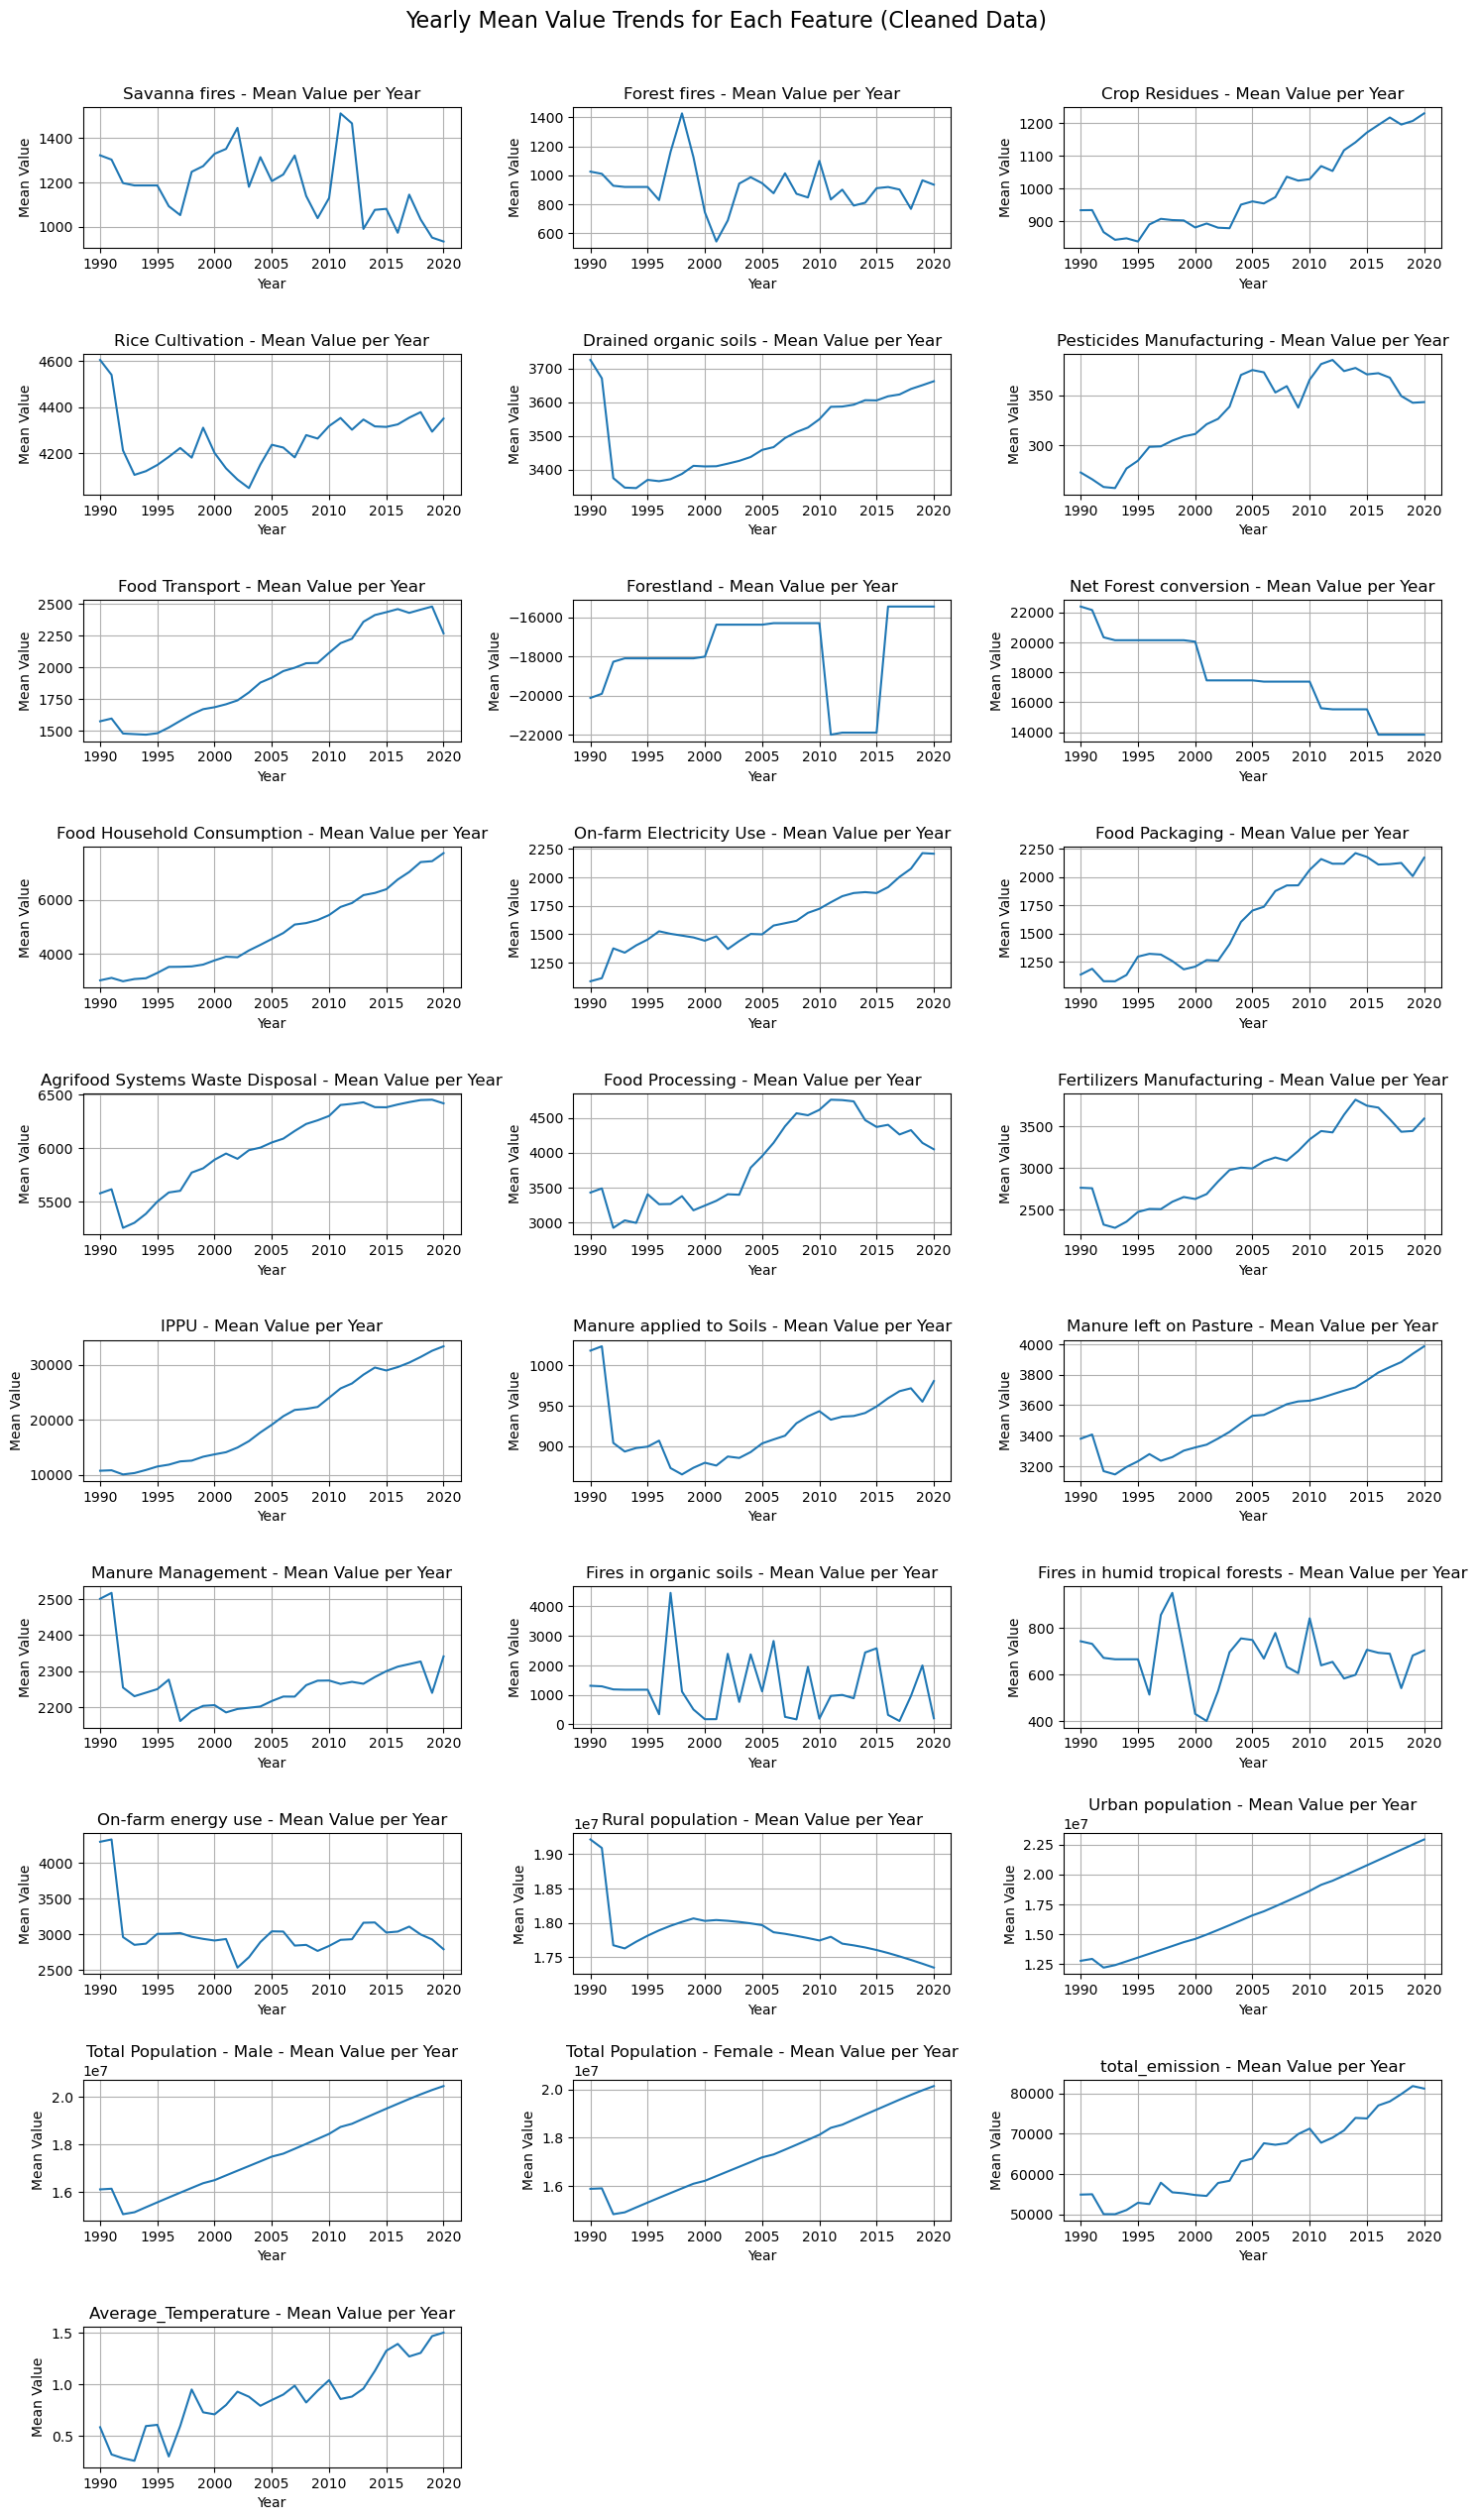

In [543]:
# Convert columns to numeric where possible, setting errors='coerce' to handle non-numeric values by converting them to NaN
numeric_data = df_copy.apply(pd.to_numeric, errors='coerce')

# Calculate the mean per year again after ensuring all values are numeric
mean_per_year_cleaned = numeric_data.groupby("Year").mean()

# Replot the line charts for each feature using the cleaned dataset
plt.figure(figsize=(15, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(10, 3, i)
    plt.plot(mean_per_year_cleaned.index, mean_per_year_cleaned[feature])
    plt.title(f"{feature} - Mean Value per Year")
    plt.xlabel("Year")
    plt.ylabel("Mean Value")
    plt.grid(True)
    plt.tight_layout(pad=2)

plt.suptitle("Yearly Mean Value Trends for Each Feature (Cleaned Data)", y=1.02, fontsize=16)
plt.show()

Trends in total emissions over time.

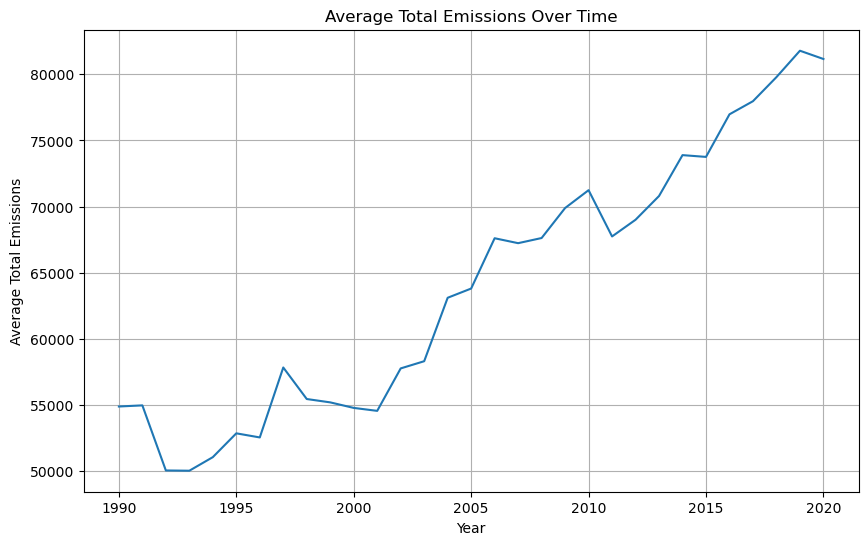

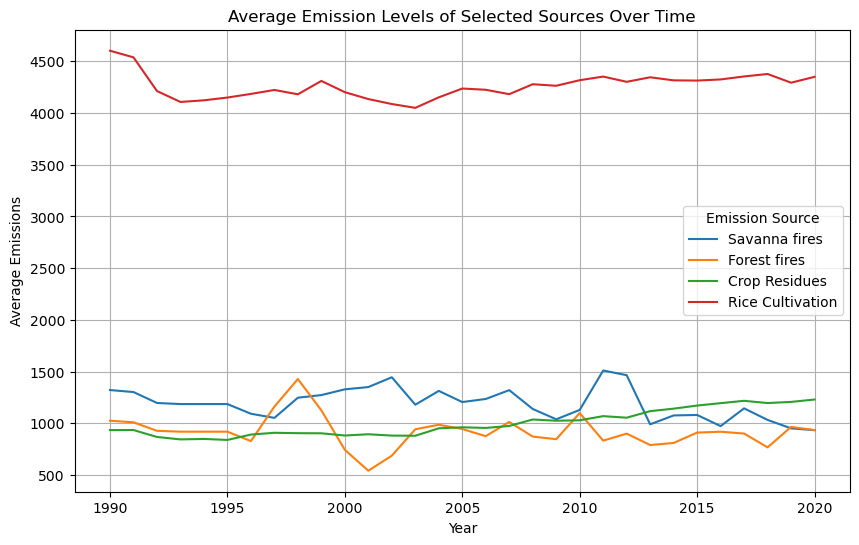

In [544]:
# Plotting total emissions over time to observe any general trend
plt.figure(figsize=(10, 6))
df_copy.groupby("Year")["total_emission"].mean().plot()
plt.title("Average Total Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Average Total Emissions")
plt.grid(True)
plt.show()

# Plotting individual emission sources over time
plt.figure(figsize=(10, 6))
emission_sources = ["Savanna fires", "Forest fires", "Crop Residues", "Rice Cultivation"]
for source in emission_sources:
    df_copy.groupby("Year")[source].mean().plot(label=source)

plt.title("Average Emission Levels of Selected Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Average Emissions")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

The visualizations reveal:

Total Emissions Trend: There is a gradual increase in average total emissions over time, with some fluctuations, indicating an overall growth in agricultural emissions globally.

Individual Emission Sources:

Savanna and Forest Fires: These show sporadic increases, likely due to specific events or regional practices, but no consistent growth trend.
Crop Residues: Shows a gradual, slight increase, suggesting increased agricultural activities or crop residue management over time.
Rice Cultivation: A relatively steady emission source with no significant fluctuations over the years.

### 5.1 Findings of Univariate Analysis 


1. Emission Sources
    - Savanna Fires, Forest Fires, Crop Residues: These features show fluctuating trends over time, with some spikes likely related to specific agricultural practices, land-use changes, or natural events (e.g., droughts or fires). Their distributions exhibit high variability with multiple outliers, indicating significant differences across countries.
    - Rice Cultivation and Drained Organic Soils (CO2): These show relatively stable trends, with only minor fluctuations, indicating consistency in emissions associated with these sources. The steady increase in rice cultivation emissions could correlate with global agricultural intensification.
    - Pesticides Manufacturing and Fertilizers Manufacturing: These features show a gradual upward trend, suggesting increased use over time, likely linked to modern agricultural practices.
2. Food System Emissions
    - Food Transport, Food Household Consumption, Food Processing, and Food Packaging: These emissions sources show consistent growth, highlighting increased reliance on industrialized and commercialized food systems. The increase could reflect global population growth and urbanization, as well as the globalization of food supply chains.
3. Land Use and Forest Conversion
    - Forestland and Net Forest Conversion: These features exhibit variability, with trends often indicating deforestation or changes in land use over time. The trends align with emissions linked to agricultural expansion into forested areas.
Agrifood Systems Waste Disposal: This feature shows gradual growth, suggesting increases in agricultural waste production, likely related to growing food production.
4. Population Metrics
    - Rural Population, Urban Population, Total Population - Male and Female: While rural population shows minor fluctuations, urban population steadily increases, consistent with global urbanization trends. These metrics demonstrate changing demographic patterns, with possible implications for emissions tied to rural versus urban activities.
5. Temperature
    - Average Temperature (°C): This feature shows slight increases over time, consistent with global warming trends. The gradual rise in mean temperature is evident, especially in more recent years, supporting the notion of a warming climate that could impact agriculture.
6. Total Emission
    - Total Emission: There’s a general upward trend in total emissions, suggesting that agricultural emissions continue to increase over time, driven by population growth, intensified farming practices, and food system demands.

General Observations:
- Skewed Distributions and Outliers: Many features show skewed distributions and high variability, with notable outliers, particularly in emissions related to fires and forest conversion. These outliers reflect regional or temporal variations in agricultural practices and environmental factors.
- Growth Trends: Key features like pesticides, fertilizers, food transport, and packaging are on an upward trajectory, pointing to an expanding and industrializing agricultural sector.
- Implications for Modeling: The wide range and skewness in data suggest that normalization or transformation may improve the effectiveness of predictive models using this data.

### 5.2 Multi-Variate Analysis

A big part of exploratory data analysis is seeing how mutliple variables are related. We can use multiple different types of plots to easily see these relationships. By understanding these relationships we can start to udnerstand which features may be releated or can serve to predict others.

Correlation Matrices

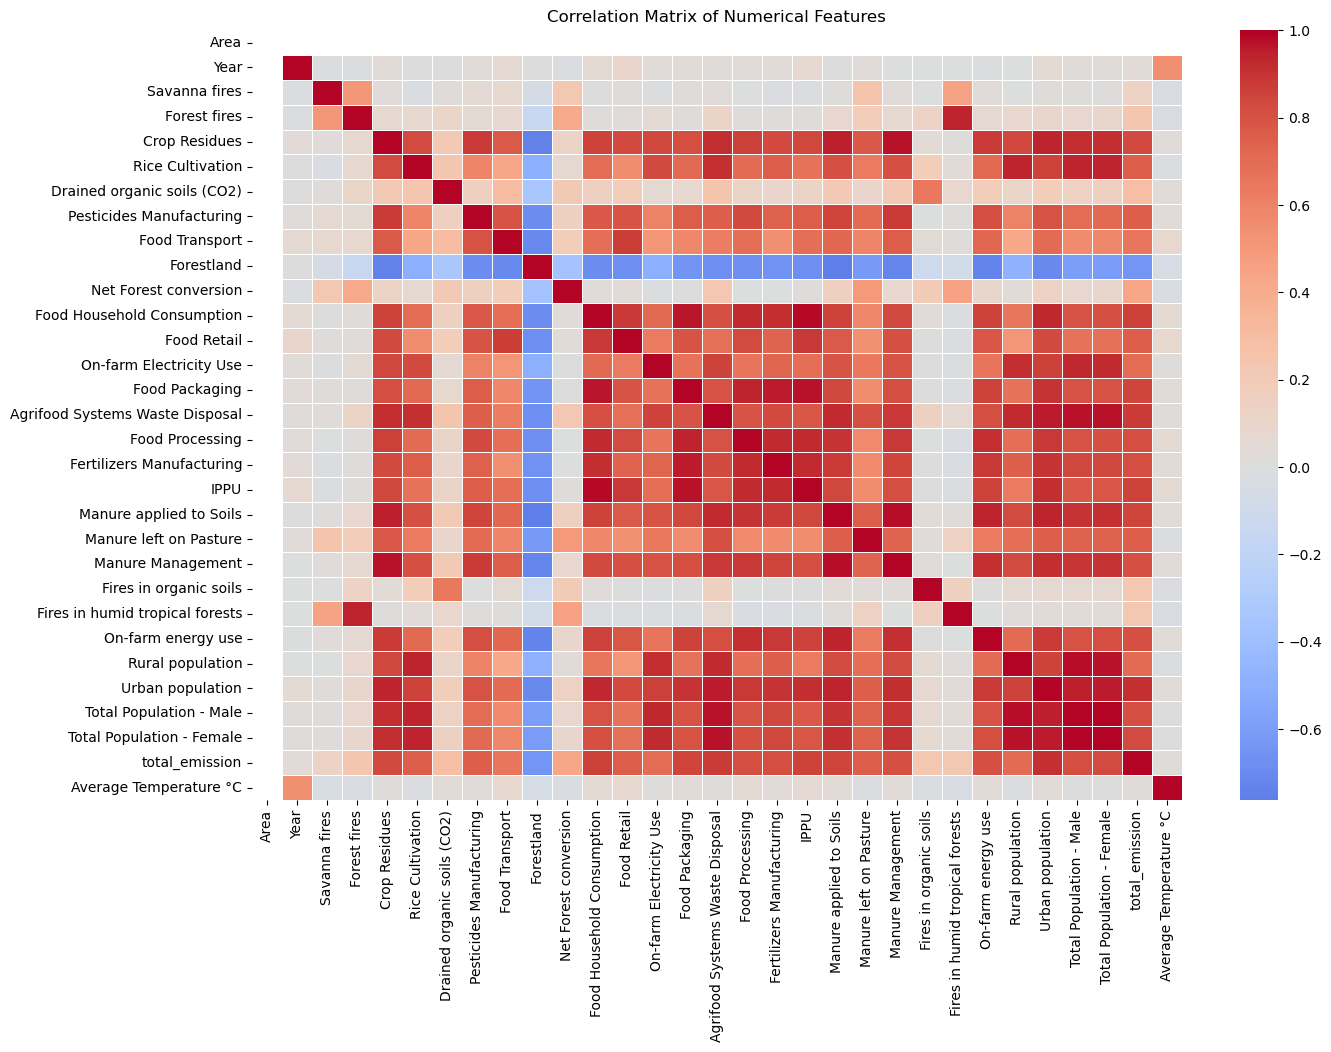

Total Population - Male          Total Population - Female          0.999708
IPPU                             Food Household Consumption         0.985263
Manure applied to Soils          Manure Management                  0.975795
Total Population - Male          Rural population                   0.974610
Total Population - Female        Rural population                   0.971561
Agrifood Systems Waste Disposal  Total Population - Female          0.969805
Manure Management                Crop Residues                      0.968376
Food Packaging                   IPPU                               0.968319
Total Population - Male          Agrifood Systems Waste Disposal    0.966827
Food Household Consumption       Food Packaging                     0.965524
dtype: float64

In [494]:
#We can see all the relationships that will be polotted via the pearson correlation coefficient 

# Correlation matrix for numeric features
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix to analyze linear relationships
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Display the top correlations for deeper insight
correlation_matrix_unstacked = correlation_matrix.unstack().sort_values(ascending=False)
high_correlations = correlation_matrix_unstacked[correlation_matrix_unstacked < 1].drop_duplicates().head(10)
high_correlations

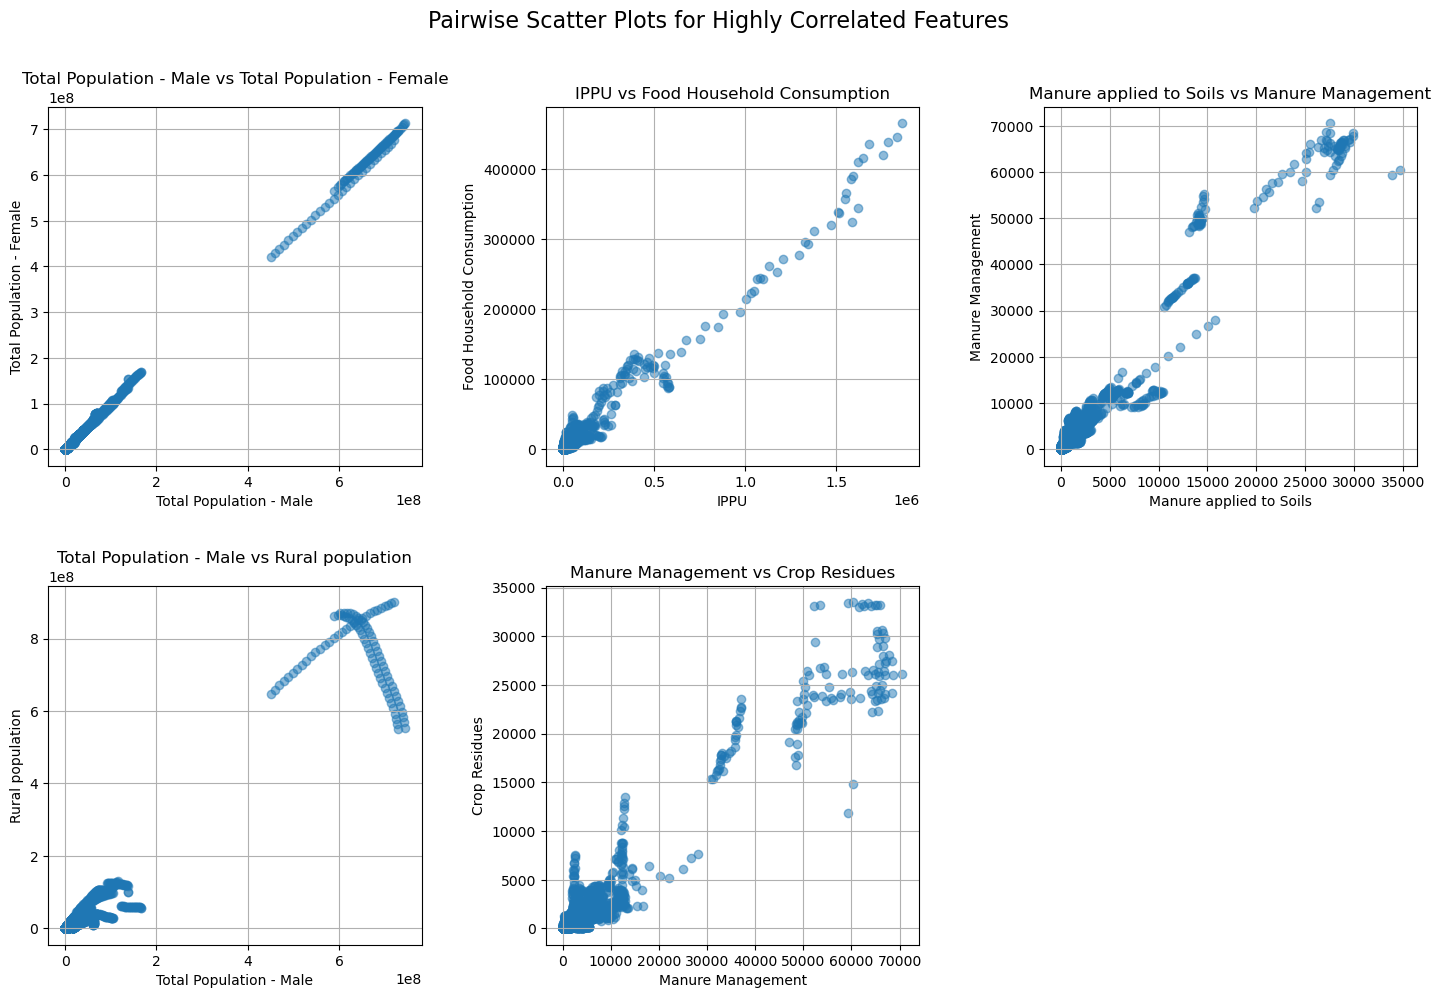

In [496]:
# Pairwise scatter plots for top correlated features
high_corr_pairs = [
    ("Total Population - Male", "Total Population - Female"),
    ("IPPU", "Food Household Consumption"),
    ("Manure applied to Soils", "Manure Management"),
    ("Total Population - Male", "Rural population"),
    ("Manure Management", "Crop Residues")
]

# Plot pairwise relationships
plt.figure(figsize=(15, 10))
for i, (feature_x, feature_y) in enumerate(high_corr_pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(numeric_data[feature_x], numeric_data[feature_y], alpha=0.5)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"{feature_x} vs {feature_y}")
    plt.grid(True)

plt.tight_layout(pad=3)
plt.suptitle("Pairwise Scatter Plots for Highly Correlated Features", y=1.02, fontsize=16)
plt.show()

### 5.2 Findings of Multi- Variate Analysis

Summary: 

1. Highly Correlated Population Features:

- Total Population - Male and Total Population - Female show an almost perfect correlation (0.9997), as expected since these are components of total population.
- Rural Population is highly correlated with both Total Population - Male and Total Population - Female (0.974 and 0.971, respectively), indicating that higher total populations often have larger rural segments.

2. Agricultural Practices and Emissions:

- Manure applied to Soils and Manure Management have a strong correlation (0.975), likely reflecting a relationship between manure management practices and soil applications.
- Crop Residues also correlates with Manure Management (0.968), suggesting that residue and manure management are linked agricultural practices.
- Rice Cultivation and Drained Organic Soils (CO2) show consistent levels, reflecting stable emissions from these sources over time.

3. Food System and Emissions:

- Food Household Consumption correlates highly with IPPU (industrial process emissions) and Food Packaging (0.985 and 0.965, respectively), implying a link between household food consumption and packaging-related emissions, likely reflecting processed or packaged food demands.

Findings on Feature Relationships

- Population and Emissions: The strong correlations between population metrics and various emissions (especially manure and food household consumption) indicate that larger populations likely contribute more to certain types of emissions, likely due to higher agricultural demand and food production.

- Agricultural Practices: Correlated practices, like manure management, soil applications, and crop residues, suggest that emissions from agriculture are often influenced by specific combinations of practices.

- Food System Industrialization: Close relationships between food consumption, packaging, and industrial emissions underscore the impact of food processing and retail on emissions, driven by consumer demand for packaged and processed foods.

## 6. Data Processing

We prepare the data for modelling by splitting it into training and testing sets and scaling the features to help our models perform optimally.

In [552]:
# Drop non-numeric columns and rows with missing target values for simplicity
data_numeric = data_dropped_area.select_dtypes(include='number')
data_cleaned = data_numeric.dropna(subset=['Average_Temperature'])

# Separate features and target variable
X = data_cleaned.drop(columns=['Average_Temperature'])
y = data_cleaned['Average_Temperature']

# Impute missing values in features with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and apply MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Model training and Evaluation

In [474]:
def train_and_evaluate_model(model):
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return model, r2, mse

### 7.1 Linear Regression Model

In [476]:
# Training and evaluating the multiple linear regression model
linear_model, linear_r2, linear_mse = train_and_evaluate_model(LinearRegression())
print(f"Linear regression - R²: {linear_r2}, MSE: {linear_mse}")

Linear regression - R²: 0.33011000812167823, MSE: 0.20536846807430906


### 7.2 Decision Tree Model

In [478]:
# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_mse = train_and_evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=8))
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")

Decision tree regression - R²: 0.4416970507128717, MSE: 0.1711591795765961


### 7.3 Random Forest Model

In [480]:
# Training and evaluating the random forest regression model
forest_model, forest_r2, forest_mse = train_and_evaluate_model(RandomForestRegressor(random_state=42, max_depth=15))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")

Random Forest Regression - R²: 0.6329538411522991, MSE: 0.11252550160325984


### 7.4 Stacking ensemble model

In [481]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', linear_model),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()

In [502]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_mse = train_and_evaluate_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=10))
print(f"Stacking Regression - R²: {stacking_r2}, MSE: {stacking_mse}")

Stacking Regression - R²: 0.6325130368432412, MSE: 0.11266063917326284


### 7.5 Evaluate Performance

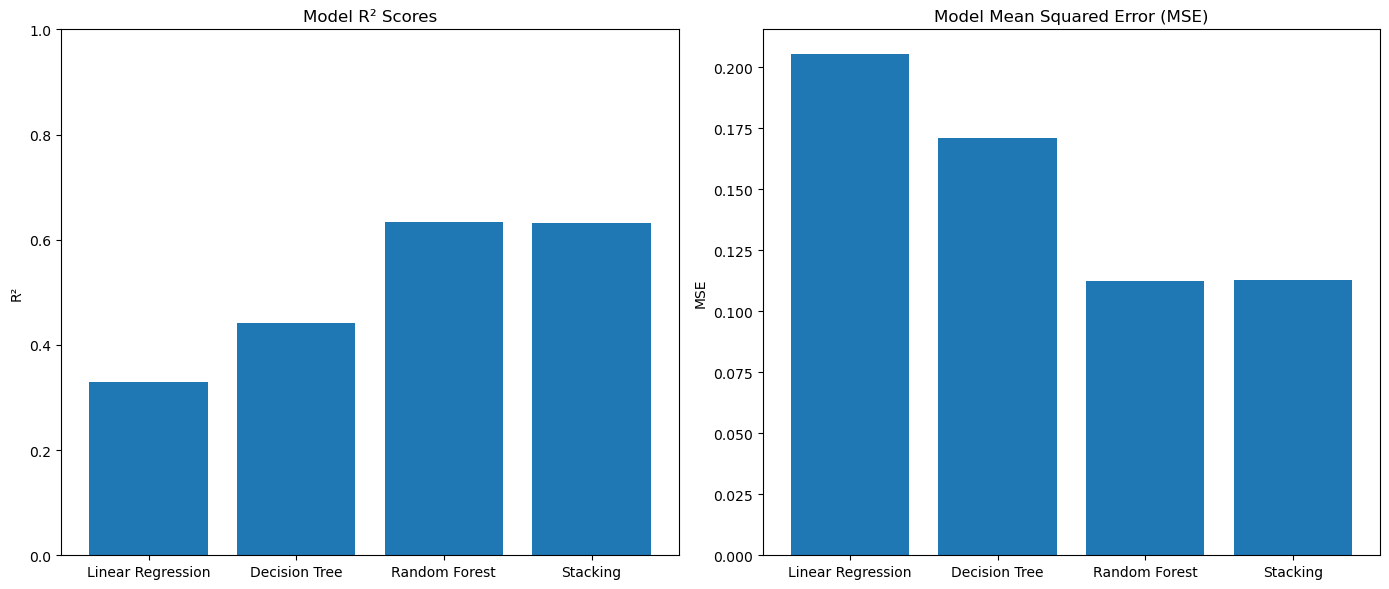

In [504]:
# Model performance data
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Stacking']
r2_scores = [linear_r2, tree_r2, forest_r2, stacking_r2]
mse_scores = [linear_mse, tree_mse, forest_mse, stacking_mse]

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² Scores
ax[0].bar(model_names, r2_scores)
ax[0].set_title('Model R² Scores')
ax[0].set_ylabel('R²')
ax[0].set_ylim(0, 1)  # Assuming R² is between 0 and 1 for clear comparison

# Plot MSE Scores
ax[1].bar(model_names, mse_scores)
ax[1].set_title('Model Mean Squared Error (MSE)')
ax[1].set_ylabel('MSE')

# Show the plot
plt.tight_layout()
plt.show()

## 8. Conclusion 

Based on the model evaluation metrics, we can draw several conclusions about the performance and suitability of the models tested, specifically regarding their R2 scores and Mean Squared Error (MSE) values. Here’s a breakdown of the models' performances and why the Random Forest Regression model appears to be the most suitable for this scenario:(e.g., temperature).


Model Evaluation Summary

1. Linear Regression
    - R2: 0.33
    - MSE: 0.205
    - This model shows a relatively low R2, indicating that it explains only about 33% of the variance in the target variable. The MSE is also relatively high, signifying larger errors in predictions
    
2. Decision Tree Regression
    - R2: 0.44
    - MSE: 0.171
    - This model performs better than linear regression, explaining 44% of the variance, with a moderate reduction in MSE compared to linear regression. However, decision trees can be prone to overfitting, and the performance here is still not optimal.n
3. Random Forest Regression
    - R2: 0.63
    - MSE: 0.113
    - Random Forest outperforms both linear and decision tree regression models, explaining 63% of the variance with a lower MSE of 0.113. The improvement in MSE indicates that it is better at minimizing prediction errors.
  
4. Stacking Regression
    -  R2: 0.63
    -  MSE: 0.113
    -  Although the stacking model’s performance is similar to Random Forest with a comparable R2 and MSE, it does not show any notable advantage. This could indicate that stacking here does not capture additional patterns beyond what the Random Forest model achieves.
  
Why Random Forest Regression is the Most Suitable

1.	Higher R2: The Random Forest Regression model provides the highest R2 value, explaining a larger portion of the variance in the target variable than other models. This suggests it captures relationships between predictors and the target variable more effectively.
2.	Lower Prediction Error (MSE): With the lowest MSE, Random Forest regression minimizes errors better than other models, making its predictions more accurate. This is particularly valuable in scenarios where precise predictions are essential.
3.	Handling Complexity and Feature Interactions: Random Forest models can capture complex, nonlinear relationships and interactions between features, which linear models and even individual decision trees might miss. Given the wide range of features related to different emission sources and demographics in this dataset, Random Forest’s ability to model complex dependencies is advantageous.
4.	Stability and Robustness: Random Forest, as an ensemble of decision trees, is inherently more stable and less prone to overfitting than a single decision tree. This leads to more generalized predictions across different datasets or when applied to new dure).
s.


The Random Forest Regression model stands out as the best fit for this scenario due to its balance of interpretability, high R2, low MSE, and ability to handle complex data relationships. This makes it an ideal model for predicting outcomes in a multi-faceted dataset like agricultural emissions, where numerous interdependent factors impact the target variable (e.g., temperature).